# Pacotes e dados

## Pacotes

In [12]:
# Install Kaggle API for download competition data
!pip3 install -q kaggle

In [13]:
!pip install pydicom

     |████████████████████████████████| 35.5MB 89kB/s 


In [1]:
# Importar os pacotes
import numpy as np
import pandas as pd
import os
import random 
from shutil import copyfile
import pydicom as dicom
import cv2
import matplotlib.pyplot as plt
from matplotlib.image import imread

from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

from tensorflow.keras import backend as K 
K.set_image_data_format('channels_last')

In [15]:
!wget http://download.cs.stanford.edu/deep/CheXpert-v1.0-small.zip

--2020-07-06 13:14:30--  http://download.cs.stanford.edu/deep/CheXpert-v1.0-small.zip
Resolving download.cs.stanford.edu (download.cs.stanford.edu)... 171.64.64.22
Connecting to download.cs.stanford.edu (download.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11557753157 (11G) [application/zip]
Saving to: ‘CheXpert-v1.0-small.zip’

CheXpert-v1.0-small 100%[===================>]  10.76G  2.11MB/s    in 91m 31s 

2020-07-06 14:46:02 (2.01 MB/s) - ‘CheXpert-v1.0-small.zip’ saved [11557753157/11557753157]



In [16]:
!unzip CheXpert-v1.0-small.zip

A saída de streaming foi truncada nas últimas 5000 linhas.
  inflating: CheXpert-v1.0-small/train/patient21643/study3/view1_frontal.jpg  
   creating: CheXpert-v1.0-small/train/patient21643/study1/
  inflating: CheXpert-v1.0-small/train/patient21643/study1/view1_frontal.jpg  
   creating: CheXpert-v1.0-small/train/patient21643/study2/
  inflating: CheXpert-v1.0-small/train/patient21643/study2/view1_frontal.jpg  
   creating: CheXpert-v1.0-small/train/patient63218/
   creating: CheXpert-v1.0-small/train/patient63218/study1/
  inflating: CheXpert-v1.0-small/train/patient63218/study1/view1_frontal.jpg  
   creating: CheXpert-v1.0-small/train/patient08046/
   creating: CheXpert-v1.0-small/train/patient08046/study1/
  inflating: CheXpert-v1.0-small/train/patient08046/study1/view1_frontal.jpg  
   creating: CheXpert-v1.0-small/train/patient08046/study5/
  inflating: CheXpert-v1.0-small/train/patient08046/study5/view1_frontal.jpg  
  inflating: CheXpert-v1.0-small/train/patient08046/study5/vi

## Dados

### Kaggle rsna

In [17]:
kjson = pd.read_json('kaggle.json',typ='series')

In [18]:
# enter your Kaggle credentionals here

os.environ['KAGGLE_USERNAME']= "matheuscoradini"
os.environ['KAGGLE_KEY']= kjson.key

In [19]:
!kaggle datasets download --force tawsifurrahman/covid19-radiography-database

100% 1.15G/1.15G [00:29<00:00, 72.2MB/s]
100% 1.15G/1.15G [00:29<00:00, 41.9MB/s]


In [20]:
!kaggle datasets download --force raddar/tuberculosis-chest-xrays-shenzhen

100% 3.51G/3.51G [01:23<00:00, 35.3MB/s]
100% 3.51G/3.51G [01:23<00:00, 45.0MB/s]


In [21]:
!kaggle datasets download --force praveengovi/coronahack-chest-xraydataset

 99% 1.18G/1.19G [00:34<00:00, 40.3MB/s]
100% 1.19G/1.19G [00:34<00:00, 36.7MB/s]


In [22]:
!unzip coronahack-chest-xraydataset.zip

A saída de streaming foi truncada nas últimas 5000 linhas.
  inflating: Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/IM-0447-0001.jpeg  
  inflating: Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/IM-0448-0001.jpeg  
  inflating: Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/IM-0449-0001.jpeg  
  inflating: Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/IM-0450-0001.jpeg  
  inflating: Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/IM-0451-0001.jpeg  
  inflating: Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/IM-0452-0001.jpeg  
  inflating: Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/IM-0453-0001-0002.jpeg  
  inflating: Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/IM-0453-0001.jpeg  
  inflating: Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/IM-0455-0001.jpeg  
  inflating: Coronahack-Chest-XRay-Dataset/Co

In [23]:
!unzip covid19-radiography-database.zip

Archive:  covid19-radiography-database.zip
  inflating: COVID-19 Radiography Database/COVID-19.metadata.xlsx  
  inflating: COVID-19 Radiography Database/COVID-19/COVID-19 (1).png  
  inflating: COVID-19 Radiography Database/COVID-19/COVID-19 (10).png  
  inflating: COVID-19 Radiography Database/COVID-19/COVID-19 (100).png  
  inflating: COVID-19 Radiography Database/COVID-19/COVID-19 (101).png  
  inflating: COVID-19 Radiography Database/COVID-19/COVID-19 (102).png  
  inflating: COVID-19 Radiography Database/COVID-19/COVID-19 (103).png  
  inflating: COVID-19 Radiography Database/COVID-19/COVID-19 (104).png  
  inflating: COVID-19 Radiography Database/COVID-19/COVID-19 (105).png  
  inflating: COVID-19 Radiography Database/COVID-19/COVID-19 (106).png  
  inflating: COVID-19 Radiography Database/COVID-19/COVID-19 (107).png  
  inflating: COVID-19 Radiography Database/COVID-19/COVID-19 (108).png  
  inflating: COVID-19 Radiography Database/COVID-19/COVID-19 (109).png  
  inflating: COV

In [24]:
!unzip tuberculosis-chest-xrays-shenzhen.zip

Archive:  tuberculosis-chest-xrays-shenzhen.zip
  inflating: images/images/CHNCXR_0001_0.png  
  inflating: images/images/CHNCXR_0002_0.png  
  inflating: images/images/CHNCXR_0003_0.png  
  inflating: images/images/CHNCXR_0004_0.png  
  inflating: images/images/CHNCXR_0005_0.png  
  inflating: images/images/CHNCXR_0006_0.png  
  inflating: images/images/CHNCXR_0007_0.png  
  inflating: images/images/CHNCXR_0008_0.png  
  inflating: images/images/CHNCXR_0009_0.png  
  inflating: images/images/CHNCXR_0010_0.png  
  inflating: images/images/CHNCXR_0011_0.png  
  inflating: images/images/CHNCXR_0012_0.png  
  inflating: images/images/CHNCXR_0013_0.png  
  inflating: images/images/CHNCXR_0014_0.png  
  inflating: images/images/CHNCXR_0015_0.png  
  inflating: images/images/CHNCXR_0016_0.png  
  inflating: images/images/CHNCXR_0017_0.png  
  inflating: images/images/CHNCXR_0018_0.png  
  inflating: images/images/CHNCXR_0019_0.png  
  inflating: images/images/CHNCXR_0020_0.png  
  inflating:

# Metadata

In [17]:
meta_hack = pd.read_csv('Chest_xray_Corona_Metadata.csv')

In [18]:
meta_hack.head()

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
0,0,IM-0128-0001.jpeg,Normal,TRAIN,NaN,NaN
1,1,IM-0127-0001.jpeg,Normal,TRAIN,NaN,NaN
2,2,IM-0125-0001.jpeg,Normal,TRAIN,NaN,NaN
3,3,IM-0122-0001.jpeg,Normal,TRAIN,NaN,NaN
4,4,IM-0119-0001.jpeg,Normal,TRAIN,NaN,NaN


In [19]:
meta_hack['Label_1_Virus_category'].value_counts()

bacteria          2777
Virus             1555
Stress-Smoking       2
Name: Label_1_Virus_category, dtype: int64

In [20]:
meta_hack.Label_2_Virus_category.value_counts()

COVID-19         58
Streptococcus     5
SARS              4
ARDS              2
Name: Label_2_Virus_category, dtype: int64

In [21]:
meta_hack_covid = meta_hack[meta_hack.Label_2_Virus_category == 'COVID-19']
meta_hack_normal = meta_hack[(meta_hack.Label_1_Virus_category.isnull()) & (meta_hack.Dataset_type == 'TRAIN')]

In [22]:
meta_hack_normal.shape

(1342, 6)

In [23]:
meta_hack_covid.shape

(58, 6)

In [24]:
meta_hack_covid.Dataset_type.value_counts()

TRAIN    58
Name: Dataset_type, dtype: int64

In [25]:
meta_tub = pd.read_csv('shenzhen_metadata.csv')

In [26]:
meta_tub.head()

,study_id,sex,age,findings
0,CHNCXR_0001_0.png,Male,45,normal
1,CHNCXR_0002_0.png,Male,63,normal
2,CHNCXR_0003_0.png,Female,48,normal
3,CHNCXR_0004_0.png,Male,58,normal
4,CHNCXR_0005_0.png,Male,28,normal


In [27]:
meta_tub.findings.value_counts().head(20)

normal                                         326
bilateral PTB                                   61
Right PTB                                       45
PTB in the right upper field                    27
left PTB                                        19
PTB in the left upper field                     19
STB                                             19
Bilateral secondary PTB                         16
secondary PTB  in the right upper field         12
right secondary PTB                             10
secondary PTB  in the left upper field           8
PTB in the bilateral upper field                 8
right upper PTB                                  6
secondary PTB  in the bilateral upper field      6
PTB in the right lower field                     4
PTB  in the right upper field                    3
PTB in the left lower field                      3
PTB in the bilateral upper fields                3
left secondary PTB                               3
Old PTB in the right upper fiel

In [28]:
meta_tub.loc[meta_tub['findings'] == 'normal', 'findings'] = 1
meta_tub.loc[meta_tub['findings'] != 1, 'findings'] = 3

In [29]:
meta_tub.findings.value_counts()

3    336
1    326
Name: findings, dtype: int64

In [30]:
y_tub = meta_tub.findings

## Diretório de imagem

In [31]:
# Lista o conteúdo 
os.listdir('COVID-19 Radiography Database/')

['Viral Pneumonia.matadata.xlsx',
 'NORMAL.metadata.xlsx',
 'COVID-19.metadata.xlsx',
 'NORMAL',
 'Viral Pneumonia',
 'COVID-19',
 'README.md.txt']

In [32]:
imagens_normal = 'COVID-19 Radiography Database/NORMAL'
imagens_covid = 'COVID-19 Radiography Database/COVID-19'
imagens_pneu = 'COVID-19 Radiography Database/Viral Pneumonia'
imagens_sh = 'images/images'
imagens_xpert_train = 'CheXpert-v1.0-small/train'
imagens_xpert_valid = 'CheXpert-v1.0-small/valid'
imagens_hack = 'Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train'

In [33]:
print(len(os.listdir(imagens_normal)))

1341


In [34]:
print(len(os.listdir(imagens_covid)))

219


In [35]:
print(len(os.listdir(imagens_pneu)))

1345


In [36]:
print(len(os.listdir(imagens_sh)))

662


In [37]:
print(len(os.listdir(imagens_xpert_train)))

64540


In [38]:
print(len(os.listdir(imagens_xpert_valid)))

200


In [39]:
covid_image_list = os.listdir(imagens_normal)
normal_image_list = os.listdir(imagens_covid)
pneu_image_list = os.listdir(imagens_pneu)
sh_image_list = os.listdir(imagens_sh)
xpert_train_list = os.listdir(imagens_xpert_train)
xpert_test_list = os.listdir(imagens_xpert_valid)

# Stanford CheXpert

In [40]:
train = pd.read_csv('CheXpert-v1.0-small/train.csv')
valid = pd.read_csv('CheXpert-v1.0-small/valid.csv')

In [41]:
train = train[train['Frontal/Lateral'] == 'Frontal']
valid = valid[valid['Frontal/Lateral'] == 'Frontal']

In [42]:
train['Patient'] = train.Path.apply(lambda x: x[:38])
valid['Patient'] = valid.Path.apply(lambda x: x[:38])

In [43]:
train = train.drop_duplicates(subset='Patient')
valid = valid.drop_duplicates(subset='Patient')

In [44]:
train.shape, valid.shape

((64534, 20), (200, 20))

In [45]:
train.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices,Patient
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0,CheXpert-v1.0-small/train/patient00001
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,NaN,NaN,-1.0,1.0,NaN,-1.0,-1.0,NaN,-1.0,NaN,-1.0,NaN,1.0,NaN,CheXpert-v1.0-small/train/patient00002
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,CheXpert-v1.0-small/train/patient00003
5,CheXpert-v1.0-small/train/patient00004/study1/...,Female,20,Frontal,PA,1.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,CheXpert-v1.0-small/train/patient00004
7,CheXpert-v1.0-small/train/patient00005/study1/...,Male,33,Frontal,PA,1.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,1.0,CheXpert-v1.0-small/train/patient00005


In [46]:
for i in train.columns:
  train = train[train[i] != -1]

In [47]:
train.shape

(40150, 20)

In [48]:
train['No Finding'].value_counts()

1.0    10008
Name: No Finding, dtype: int64

In [49]:
train['Pneumonia'].value_counts()

1.0    1268
0.0     893
Name: Pneumonia, dtype: int64

In [50]:
train['Edema'].value_counts()

1.0    7564
0.0    5304
Name: Edema, dtype: int64

In [51]:
train['Fracture'].value_counts()

1.0    2438
0.0    1367
Name: Fracture, dtype: int64

In [52]:
train['Fracture'].value_counts()

1.0    2438
0.0    1367
Name: Fracture, dtype: int64

In [53]:
train_normal = train[train['No Finding'] == 1]

# Preparing features

In [54]:
paths = []
y = []

for dirname, _, filenames in os.walk('COVID-19 Radiography Database/Viral Pneumonia'):
    for filename in filenames:
        if (filename[-3:] == 'png'):
            paths.append(os.path.join(dirname, filename))
            y.append(0)
            
for dirname, _, filenames in os.walk('COVID-19 Radiography Database/NORMAL'):
    for filename in filenames:
        if (filename[-3:] == 'png'):
            paths.append(os.path.join(dirname, filename))
            y.append(1)   

for dirname, _, filenames in os.walk('COVID-19 Radiography Database/COVID-19'):
    for filename in filenames:
        if (filename[-3:] == 'png'):
            paths.append(os.path.join(dirname, filename))
            y.append(2)
  
for dirname, _, filenames in os.walk(imagens_hack):
    for filename in filenames:
        if (filename[-3:] == 'png'):
            paths.append(os.path.join(dirname, filename))
            y.append(2)

for dirname, _, filenames in os.walk(imagens_sh):
    for filename in filenames:
        if (filename[-3:] == 'png'):
            paths.append(os.path.join(dirname, filename))
y_tub = list(y_tub)
y.extend(y_tub)

for path in train_normal.Path:
    paths.append(path)
    y.append(1)

for path in meta_hack_covid.X_ray_image_name:
     full_path = imagens_hack + "/" + path
     paths.append(full_path)
     y.append(2)

for path in meta_hack_normal.X_ray_image_name:
     full_path = imagens_hack + "/" + path
     paths.append(full_path)
     y.append(1)

In [55]:
len(paths)

14983

In [56]:
len(y)

14983

In [57]:
paths[-1]

'Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/F051E018-DAD1-4506-AD43-BE4CA29E960B.jpeg'

In [58]:
X = []
for i in paths:
    image = cv2.imread(i)
    try:
      image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    except:
      image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (128, 128))

    X.append(image)

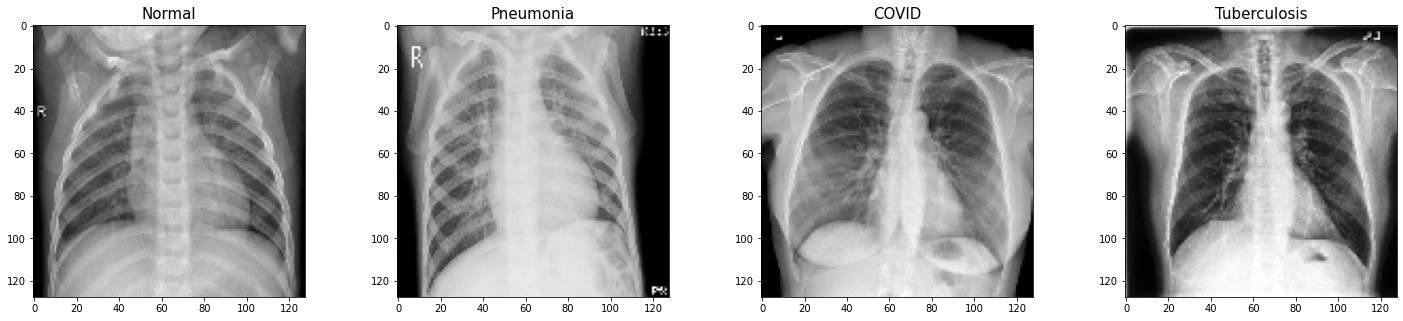

In [59]:
fig, (ax1, ax2,ax3,ax4) = plt.subplots(ncols = 4,nrows = 1, figsize = (25,5))
ax1.imshow(X[1500],cmap='gray')
ax2.imshow(X[0],cmap='gray')
ax3.imshow(X[2900],cmap='gray')
ax4.imshow(X[4000],cmap='gray')

ax1.set_title('Normal',fontsize=15)
ax2.set_title('Pneumonia',fontsize=15)
ax3.set_title('COVID',fontsize=15)
ax4.set_title('Tuberculosis',fontsize=15)

plt.show()

In [60]:
del paths

In [61]:
X = np.array(X)/255
y = np.array(y)

In [62]:
X = X.reshape(-1,128,128,1)

In [63]:
X.shape

(14983, 128, 128, 1)

# Train Test Split

In [64]:
Xtest = X[-1400:]
ytest = y[-1400:]

X = X[:-1400]
y = y[:-1400]

In [65]:
Xtrain, Xval, ytrain, yval  = train_test_split(X, y, test_size = 0.33, random_state = 42)

#Xval = np.append(Xval, Xtemp)
#yval = np.append(yval, ytemp)

In [66]:
#Xval = Xval.reshape(-1,128,128,1)

In [67]:
ycat_val = to_categorical(yval,4)
ycat_train = to_categorical(ytrain,4)

# Model

In [68]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(128,128,1), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(128,128,1), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(128,128,1), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(126))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(4))
model.add(Activation('softmax'))

model.compile(optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [69]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        3

In [70]:
#early_stop = EarlyStopping(monitor='val_loss',patience=5)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', patience = 3, verbose = 1, factor = 0.5, min_lr = 0.00001)

In [71]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

In [72]:
cw = {0: 1, 1: 1, 2:2.5, 3:1}
BS = 32
results = model.fit_generator(image_gen.flow(Xtrain, ycat_train, batch_size=BS),
                              steps_per_epoch=len(Xtrain)/BS, epochs=100,
                              validation_data=(Xval,ycat_val), callbacks = [reduce_lr], class_weight=cw)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
285/284 [==============================] - 21s 74ms/step - loss: 0.4212 - accuracy: 0.8838 - val_loss: 0.2867 - val_accuracy: 0.9023 - lr: 0.0010
Epoch 2/100
285/284 [==============================] - 20s 70ms/step - loss: 0.2970 - accuracy: 0.9112 - val_loss: 0.1888 - val_accuracy: 0.9458 - lr: 0.0010
Epoch 3/100
285/284 [==============================] - 20s 72ms/step - loss: 0.2458 - accuracy: 0.9211 - val_loss: 0.1414 - val_accuracy: 0.9465 - lr: 0.0010
Epoch 4/100
285/284 [==============================] - 20s 70ms/step - loss: 0.2344 - accuracy: 0.9267 - val_loss: 0.1295 - val_accuracy: 0.9471 - lr: 0.0010
Epoch 5/100
285/284 [==============================] - 20s 71ms/step - loss: 0.2049 - accuracy: 0.9318 - val_loss: 0.1158 - val_accuracy: 0.9547 - lr: 0.0010
Epoch 6/100
285/284 [==============================] - 20s 71ms/step - loss: 0.1801 - accuracy: 0.9370 - val_loss: 0.1177 - val_accura

In [73]:
model.save_weights("model.h5")

In [74]:
model.metrics_names

['loss', 'accuracy']

In [75]:
losses = pd.DataFrame(model.history.history)

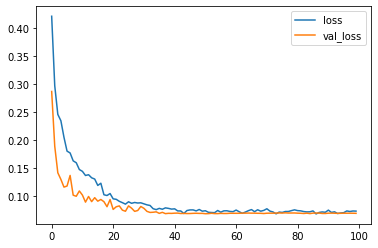

In [76]:
losses[['loss','val_loss']].plot()
plt.show()

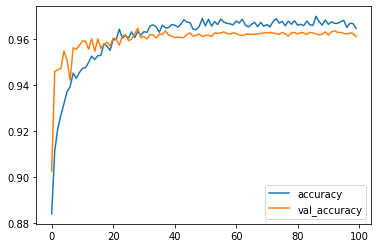

In [77]:
losses[['accuracy','val_accuracy']].plot()
plt.show()

In [78]:
pred = model.predict_classes(Xval)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [79]:
# 0: Pneumonia
# 1: Normal
# 2: COVID-19
# 3: Tuberculosis

from sklearn.metrics import classification_report
print(classification_report(yval, pred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       437
           1       0.98      0.98      0.98      3860
           2       0.94      0.88      0.91        67
           3       0.46      0.55      0.50       119

    accuracy                           0.96      4483
   macro avg       0.84      0.84      0.84      4483
weighted avg       0.96      0.96      0.96      4483



In [80]:
from sklearn.metrics import confusion_matrix
confusion_matrix(yval, pred)

array([[ 412,   24,    1,    0],
       [  10, 3772,    2,   76],
       [   0,    7,   59,    1],
       [   0,   53,    1,   65]])

In [81]:
y.shape

(13583,)

In [82]:
pred_new = model.predict_classes(Xtest)

In [86]:
print(classification_report(ytest, pred_new))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.98      0.99      1342
           2       0.95      0.98      0.97        58
           3       0.00      0.00      0.00         0

    accuracy                           0.98      1400
   macro avg       0.49      0.49      0.49      1400
weighted avg       1.00      0.98      0.99      1400



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [83]:
confusion_matrix(ytest, pred_new)

array([[   0,    0,    0,    0],
       [  25, 1309,    3,    5],
       [   0,    1,   57,    0],
       [   0,    0,    0,    0]])

In [84]:
pred_new

array([2, 2, 2, ..., 1, 1, 2])